In [23]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [24]:
handwriting_mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")

(training_images, train_labels), (testing_images, test_labels) = handwriting_mnist

In [25]:
training_images.shape

(60000, 28, 28)

In [26]:
training_images[0,23,23]

0

In [27]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [28]:
class_numbers = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

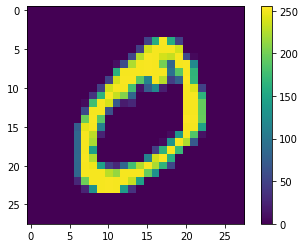

In [29]:
plt.figure()
plt.imshow(training_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Processing

In [30]:
training_images = training_images / 255.0

testing_images = testing_images / 255.0

# Building the Model

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

# Compiling the Model

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model

In [33]:
model.fit(training_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2577 - accuracy: 0.9272
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1125 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0783 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0584 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0283 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0215 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.014

# Checking Accuracy

In [34]:
test_loss, test_acc = model.evaluate(testing_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9799
Test accuracy: 0.9799000024795532


In [35]:
test_loss, test_acc = model.evaluate(testing_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9799
Test accuracy: 0.9799000024795532


# Making Predictions

In [36]:
predictions = model.predict(testing_images)

In [37]:
predictions[0]

array([2.8338963e-11, 5.3285765e-11, 1.8184014e-07, 1.8349706e-06,
       2.5795907e-13, 2.5376734e-11, 3.9133669e-20, 9.9999785e-01,
       5.8321028e-08, 1.9405457e-08], dtype=float32)

In [38]:
np.argmax(predictions[0])

7

In [39]:
test_labels[0]

7

# Verifying Predictions

Enter a number: 2


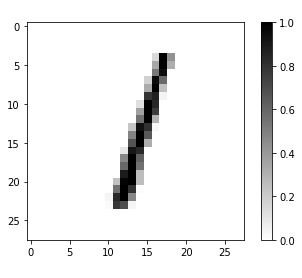

In [47]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_numbers = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
  prediction = model.predict(np.array([image]))
  predicted_class = class_numbers[np.argmax(prediction)]

  show_image(image, class_numbers[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Enter a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = testing_images[num]
label = test_labels[num]
predict(model, image, label)
